In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline
plt.style.use('ggplot')

In [2]:
vote = pd.read_csv('../../ml4-data/voters.csv')
vote.head()

,case_identifier,turnout16_2016,RIGGED_SYSTEM_1_2016,RIGGED_SYSTEM_2_2016,RIGGED_SYSTEM_3_2016,RIGGED_SYSTEM_4_2016,RIGGED_SYSTEM_5_2016,RIGGED_SYSTEM_6_2016,track_2016,persfinretro_2016,...,imiss_n_2016,imiss_o_2016,imiss_p_2016,imiss_q_2016,imiss_r_2016,imiss_s_2016,imiss_t_2016,imiss_u_2016,imiss_x_2016,imiss_y_2016
0,779,Voted,3,4,1,4,3,2,2,2,...,1,2,2,1,2,1,1,2,1,1
1,2108,Voted,2,1,3,1,3,2,2,3,...,2,1,1,1,1,2,1,2,3,4
2,2597,Voted,2,4,1,4,1,1,1,3,...,1,1,2,1,1,1,3,2,1,2
3,4148,Voted,1,4,1,4,2,1,1,1,...,1,1,3,2,2,2,3,2,2,3
4,4460,Voted,3,1,3,1,3,2,2,2,...,1,1,1,2,1,2,1,1,1,1


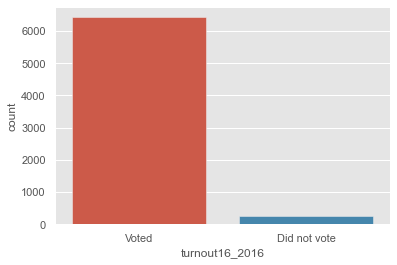

In [3]:
sns.countplot(x='turnout16_2016', data=vote)
plt.show()

In [32]:
vote = vote.iloc[:, 1:]
vote.head()

,turnout16_2016,RIGGED_SYSTEM_1_2016,RIGGED_SYSTEM_2_2016,RIGGED_SYSTEM_3_2016,RIGGED_SYSTEM_4_2016,RIGGED_SYSTEM_5_2016,RIGGED_SYSTEM_6_2016,track_2016,persfinretro_2016,econtrend_2016,...,imiss_n_2016,imiss_o_2016,imiss_p_2016,imiss_q_2016,imiss_r_2016,imiss_s_2016,imiss_t_2016,imiss_u_2016,imiss_x_2016,imiss_y_2016
0,Voted,3,4,1,4,3,2,2,2,1,...,1,2,2,1,2,1,1,2,1,1
1,Voted,2,1,3,1,3,2,2,3,3,...,2,1,1,1,1,2,1,2,3,4
2,Voted,2,4,1,4,1,1,1,3,3,...,1,1,2,1,1,1,3,2,1,2
3,Voted,1,4,1,4,2,1,1,1,1,...,1,1,3,2,2,2,3,2,2,3
4,Voted,3,1,3,1,3,2,2,2,2,...,1,1,1,2,1,2,1,1,1,1


In [34]:
from sklearn.preprocessing import LabelEncoder
y = LabelEncoder().fit_transform(vote['turnout16_2016'])
X = vote.iloc[:, 1:]

In [37]:
import statsmodels.api as sm
logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.150653
         Iterations 8
                           Results: Logit
Model:               Logit             Pseudo R-squared:  0.094     
Dependent Variable:  y                 AIC:               2098.3433 
Date:                2020-04-10 14:55  BIC:               2377.4987 
No. Observations:    6692              Log-Likelihood:    -1008.2   
Df Model:            40                LL-Null:           -1112.2   
Df Residuals:        6651              LLR p-value:       1.4534e-24
Converged:           1.0000            Scale:             1.0000    
No. Iterations:      8.0000                                         
--------------------------------------------------------------------
                      Coef.  Std.Err.    z    P>|z|   [0.025  0.975]
--------------------------------------------------------------------
RIGGED_SYSTEM_1_2016  0.2652   0.0836  3.1712 0.0015  0.1013  0.4291
RIGGED_SYSTEM_2_2016  0.1352

In [40]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2, random_state=0)
columns = X_train.columns

In [42]:
from imblearn.over_sampling import SMOTE
os = SMOTE(random_state=0)
os_data_X,os_data_y=os.fit_sample(X_train, y_train)
os_data_X = pd.DataFrame(data=os_data_X,columns=columns )
os_data_y= pd.DataFrame(data=os_data_y,columns=['turnout16_2016'])

print("Length of oversampled data is ",len(os_data_X))
print("Number of non-voters in oversampled data",len(os_data_y[os_data_y['turnout16_2016']==0]))
print("Number of voters",len(os_data_y[os_data_y['turnout16_2016']==1]))
print("Proportion of non-voters in oversampled data is ",len(os_data_y[os_data_y['turnout16_2016']==0])/len(os_data_X))
print("Proportion of voters in oversampled data is ",len(os_data_y[os_data_y['turnout16_2016']==1])/len(os_data_X))

Length of oversampled data is  10308
Number of non-voters in oversampled data 5154
Number of voters 5154
Proportion of non-voters in oversampled data is  0.5
Proportion of voters in oversampled data is  0.5


In [47]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
logreg = LogisticRegression(max_iter = 10000)
logreg.fit(os_data_X, os_data_y.values.ravel())

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=10000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [48]:
nocv_y_pred = logreg.predict(X_test)

In [55]:
from sklearn.linear_model import LogisticRegressionCV
cv_logreg = LogisticRegressionCV(max_iter = 10000, cv = 10)
cv_logreg.fit(os_data_X, os_data_y.values.ravel())

LogisticRegressionCV(Cs=10, class_weight=None, cv=10, dual=False,
                     fit_intercept=True, intercept_scaling=1.0, l1_ratios=None,
                     max_iter=10000, multi_class='auto', n_jobs=None,
                     penalty='l2', random_state=None, refit=True, scoring=None,
                     solver='lbfgs', tol=0.0001, verbose=0)

In [56]:
cv_y_pred = cv_logreg.predict(X_test)

In [52]:
from sklearn.metrics import confusion_matrix

Text(0.5, 1.0, 'LogReg without CV')

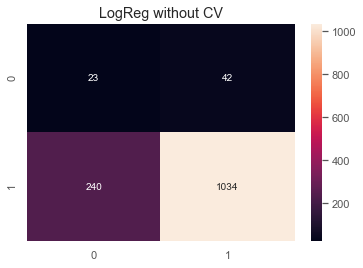

In [53]:
confusion = confusion_matrix(y_test, nocv_y_pred)
sns.heatmap(pd.DataFrame(confusion), annot=True, fmt='g')
plt.title("LogReg without CV")

Text(0.5, 1.0, 'LogReg with CV')

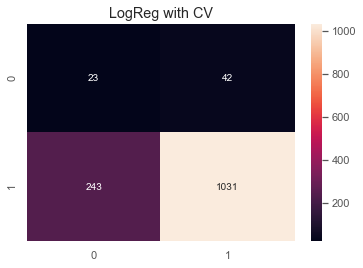

In [57]:
confusion = confusion_matrix(y_test, cv_y_pred)
sns.heatmap(pd.DataFrame(confusion), annot=True, fmt='g')
plt.title("LogReg with CV")

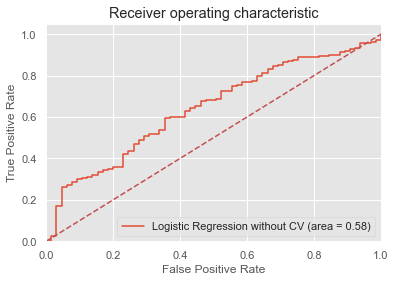

In [59]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])

plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression without CV (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

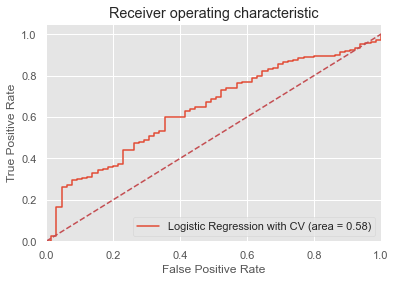

In [60]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

logit_roc_auc = roc_auc_score(y_test, cv_logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, cv_logreg.predict_proba(X_test)[:,1])

plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression with CV (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()